In [2]:
from interest.doc2vec import SentimentAnalyser

In [2]:
analyzer = SentimentAnalyser(negative_words_fp='../data/negative_words_gpt.txt', positive_words_fp='../data/positive_words_gpt.txt', articles_fp='../data/merged/combined_df.csv', model_fp='../models/pretrained/Dutch_CoNLL17_corpus/model.bin')


Calculating word vectors...: 100%|████████████████████████████████████████████████████████████████████| 3141/3141 [00:01<00:00, 1871.91article/s]


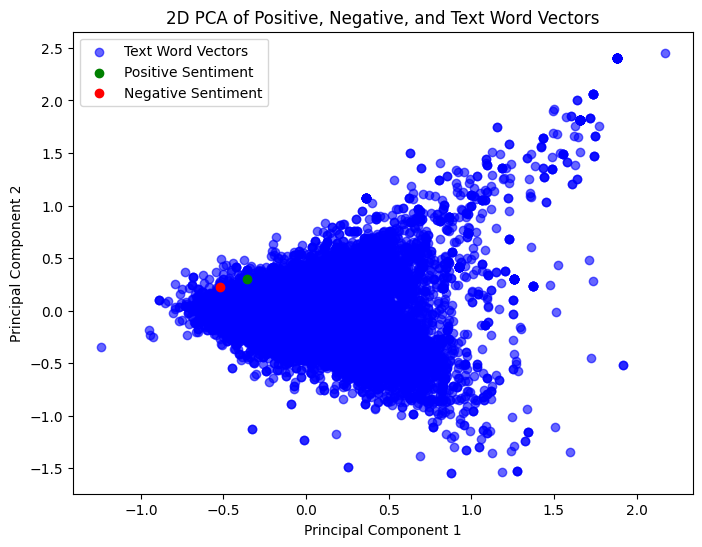

In [3]:
negative_sentiment_word_vector = analyzer.negative_words_to_word_vectors()
positive_sentiment_word_vector = analyzer.positive_words_to_word_vectors()
articles_word_vectors = analyzer.text_to_word_vectors()
analyzer.plot_word_vectors(positive_word_vector=positive_sentiment_word_vector, negative_word_vector=negative_sentiment_word_vector, articles_word_vectors=articles_word_vectors)


## Sentiments including neutral

Counts in modified_sentiment_labels:
Positive (1): 1102
Neutral (0): 946
Negative (-1): 1093
Counts in modified_article_sentiments:
Positive (1): 1012
Neutral (0): 2061
Negative (-1): 68
Confusion Matrix:
[[486 606  10]
 [304 630  12]
 [222 825  46]]
Classification Report:
              precision    recall  f1-score   support

    positive       0.68      0.04      0.08      1093
     neutral       0.31      0.67      0.42       946
    negative       0.48      0.44      0.46      1102

    accuracy                           0.37      3141
   macro avg       0.49      0.38      0.32      3141
weighted avg       0.50      0.37      0.32      3141



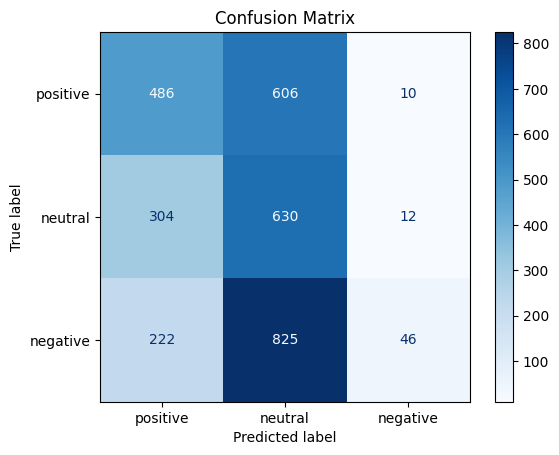

{'accuracy': 0.3699458771092009,
 'precision': 0.4959484248620026,
 'recall': 0.3699458771092009,
 'f1_score': 0.31508986112535986,
 'confusion_matrix': array([[486, 606,  10],
        [304, 630,  12],
        [222, 825,  46]])}

In [4]:
article_sentiments = analyzer.calculate_article_sentiment(articles_word_vectors=articles_word_vectors, negative_sentiment_word_vector=negative_sentiment_word_vector, positive_sentiment_word_vector=positive_sentiment_word_vector, neutral_threshold=0.05)
analyzer.evaluate_sentiment_predictions(analyzer.sentiment_labels, article_sentiments, sentiment_type='multi')


## Sentiments only positive and negative

Counts in modified_sentiment_labels:
Positive (1): 2048
Neutral (0): 0
Negative (-1): 1093
Counts in modified_article_sentiments:
Positive (1): 3073
Neutral (0): 0
Negative (-1): 68
Confusion Matrix:
[[2026   22]
 [1047   46]]
Classification Report:
              precision    recall  f1-score   support

    positive       0.68      0.04      0.08      1093
    negative       0.66      0.99      0.79      2048

    accuracy                           0.66      3141
   macro avg       0.67      0.52      0.44      3141
weighted avg       0.67      0.66      0.54      3141



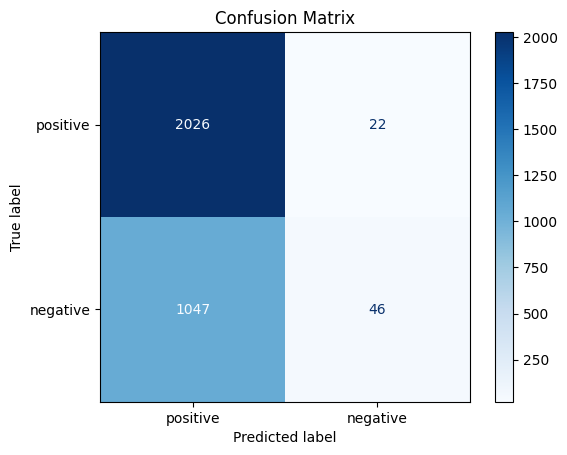

{'accuracy': 0.6596625278573702,
 'precision': 0.6652688610455811,
 'recall': 0.6596625278573702,
 'f1_score': 0.5434877558391825,
 'confusion_matrix': array([[2026,   22],
        [1047,   46]])}

In [5]:
article_sentiments = analyzer.calculate_article_sentiment(articles_word_vectors=articles_word_vectors, negative_sentiment_word_vector=negative_sentiment_word_vector, positive_sentiment_word_vector=positive_sentiment_word_vector, neutral_threshold=0.05)
analyzer.evaluate_sentiment_predictions(analyzer.sentiment_labels, article_sentiments, sentiment_type='binary')
